In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

pd.options.display.float_format = "{:.3f}".format

In [3]:
def seed_read_results(env_name, files, keys, seeds, update=True):
    parent = "results_chessworld/" + env_name + "/"
    final_dfs = {}

    for seed in seeds:
        all_dfs = []
        for file in files:

            if seed == 5 and file == 'ChessWorld-v1_gcn_formula_update2' and update:
                cur_name = parent + str(seed) + '/ChessWorld-v1_gcn_formula_update_quick.csv'
            elif seed == 5 and file == 'ChessWorld-v1_gcn_formula_update_inf' and update:
                cur_name = parent + str(seed) + '/ChessWorld-v1_gcn_formula_update_quick_inf.csv'
            else:
                cur_name = parent + str(seed) + "/" + file + ".csv"

            

            cur_df = pd.read_csv(cur_name)
            cur_df.set_index(["Task Set", "Task ID"], inplace=True)

            if "Successes x/29" in cur_df.columns:
                cur_df["Successes x/29"] *= (float(100)/29)
    
            if "Avg Discounted Return" in cur_df.columns:
                # cur_df.drop(columns=["Avg Discounted Return"], inplace=True)
                cur_df.drop(columns=["Avg Steps"], inplace=True)
    
            all_dfs.append(cur_df)
    
        df_concat = pd.concat(all_dfs, axis=1, keys=keys)
        final_dfs[seed] = df_concat

    df_mean = sum(final_dfs.values()) / len(final_dfs)
    df_std = sum([(df_mean - df_cur)**2 / len(final_dfs) for df_cur in final_dfs.values()]).apply(np.sqrt)
    return final_dfs, df_mean, df_std

In [4]:
def actual_stds(final_dfs, df_mean):
    df_mean_grouped = df_mean.groupby("Task Set").mean()
    final_dfs_grouped = [(cur_df.groupby("Task Set").mean() - df_mean_grouped)**2/len(final_dfs) for cur_df in final_dfs]

    df_std = sum(final_dfs_grouped).apply(np.sqrt)

    return df_std

In [5]:
# ChessWorld-v1 new finite tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v1/finite_tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

Reach
R_1 (F (pawn & F(rook & F(knight))))
R_2 (F ((rook&queen) & (F bishop)))
R_3 (F (bishop & rook) & (F (bishop & knight)))
Avoid 2
A2_1 (!(pawn | bishop) U (bishop & rook)) good
A2_2 (!(queen | pawn) U (rook & queen)) good
A2_3 (!(bishop | pawn) U (rook & knight)) good
A2_4 (! (knight | rook) U bishop)
A2_5 (! (bishop | knight) U queen)
A2_6 (! (rook | bishop) U pawn)
Avoid 3
A3_1 (!(bishop | knight | pawn) U (rook & queen)) good
A3_2 (!(knight | rook | bishop) U (rook & bishop)) alright
A3_3 (!(bishop | pawn | rook) U (rook & queen)) good
A3_4 (!(bishop | knight | queen) U (rook & queen)) good
Avoid 4
A4_1 (!(bishop | rook | knight | pawn) U (queen))
A4_2 (!(bishop | rook | knight | queen) U (pawn))
A4_3 (!(bishop | rook | pawn | queen) U (knight))
A4_4 (!(bishop | knight | pawn | queen) U (rook))
A4_5 (!(rook | knight | pawn | queen) U (bishop))
Avoid 5
A5_1 (!(bishop | rook | knight | pawn | queen) U (queen & pawn))
A5_2 (!(bishop | rook | knight | queen | pawn) U (pawn & rook))

In [6]:
# ChessWorld-v1 infinite tasks and results

tasks_v0 = "eval_datasets/ChessWorld-v1/infinite_tasks.txt"

with open(tasks_v0, 'r') as file:
    for line in file:
        print(line[:-1])

Reach infinite training
RIT_1 (F (G bishop))
RIT_2 (F (G queen))
RIT_3 (F (G rook))
RIT_4 (F (G pawn))
RIT_5 (F (G knight))
RIT_6 (F (G (queen | bishop)))
RIT_7 (F (G (rook | queen)))
RIT_8 (F (G (knight | pawn)))
RIT_9 (F (G (bishop | knight)))
RIT_10 (F (G (rook | pawn)))
Reach avoid always eventually
RAE_1 ((G (F knight)) & (G (F queen)))
RAE_2 ((G (F pawn)) & (G (F rook)))
RAE_3 ((G (F bishop)) & (G (F knight)) & (G (! rook)))
RAE_4 ((G (F rook)) & (G (F pawn)) & (G (! knight)))
Reach stay infinite
RSI_1 (F (G (bishop & !rook)))
RSI_2 (F (G (knight & !bishop)))
RSI_3 (F (G (queen & pawn)))
RSI_4 (F (G (rook & queen)))
RSI_5 (F (G (queen & pawn))


In [35]:
files_finite_seeds = [
                'ChessWorld-v1_deepsets_stay_update_4_finest',
                'ChessWorld-v1_deepsets_update_2',
                'ChessWorld-v1_gcn_formula_big_skip_6_finer',
                'ChessWorld-v1_deepsets_formula_update',
                'ChessWorld-v1_gcn_formula_update2',
               ]

keys_seeds = ["DeepSets (C_1)", "Deepsets (C_3)", "GCN (C_3)", "Deepsets (C_4)", 'GCN (C_4)']

dfs_ra, df_ra_mean, df_ra_std = seed_read_results("ChessWorld-v1", files_finite_seeds, keys_seeds, list(range(1, 6)))

# df_ra_mean

In [36]:
df_ra_mean.groupby("Task Set").mean()

DeepSets (C_1)                       Deepsets (C_3)  \
                        Successes x/29 Avg Discounted Return Successes x/29   
Task Set                                                                      
Avoid 2                         67.931                 0.654         88.506   
Avoid 3                         44.310                 0.422         67.069   
Avoid 4                         57.517                 0.562         85.241   
Avoid 5                         19.770                 0.189         49.310   
Reach                          100.000                 0.918         96.552   
Reach Avoid General             82.167                 0.778         91.921   
Reach Avoid X and not Y         72.690                 0.713         84.138   

                                                   GCN (C_3)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.851         84.483   
Avoid 3                                 0.642         69.138   
Avoid 4                                 0.830         71.862   
Avoid 5                                 0.475         47.356   
Reach                                   0.887         98.161   
Reach Avoid General                     0.876         82.956   
Reach Avoid X and not Y                 0.823         70.483   

                                              Deepsets (C_4)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.812         92.299   
Avoid 3                                 0.660         68.793   
Avoid 4                                 0.700         91.172   
Avoid 5                                 0.457         67.126   
Reach                                   0.891         99.080   
Reach Avoid General                     0.789         91.527   
Reach Avoid X and not Y                 0.689         91.862   

                                                   GCN (C_4)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.886         95.172   
Avoid 3                                 0.658         82.586   
Avoid 4                                 0.886         92.690   
Avoid 5                                 0.642         74.253   
Reach                                   0.906         99.310   
Reach Avoid General                     0.873         93.596   
Reach Avoid X and not Y                 0.897         91.034   

                                               
                        Avg Discounted Return  
Task Set                                       
Avoid 2                                 0.913  
Avoid 3                                 0.785  
Avoid 4                                 0.902  
Avoid 5                                 0.709  
Reach                                   0.915  
Reach Avoid General                     0.892  
Reach Avoid X and not Y                 0.888

In [9]:
# dfs_ra[5].groupby("Task Set").mean()

In [10]:
actual_stds(dfs_ra.values(), df_ra_mean)

DeepSets (C_1)                       Deepsets (C_3)  \
                        Successes x/29 Avg Discounted Return Successes x/29   
Task Set                                                                      
Avoid 2                          5.272                 0.051          6.071   
Avoid 3                          9.913                 0.095         10.479   
Avoid 4                          4.152                 0.039          5.763   
Avoid 5                          6.619                 0.061          5.002   
Reach                            0.000                 0.004          3.777   
Reach Avoid General              6.764                 0.062          3.707   
Reach Avoid X and not Y          4.946                 0.048          6.572   

                                                   GCN (C_3)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.055          6.751   
Avoid 3                                 0.100          5.068   
Avoid 4                                 0.053          7.025   
Avoid 5                                 0.046          5.005   
Reach                                   0.039          2.132   
Reach Avoid General                     0.035          4.812   
Reach Avoid X and not Y                 0.063          8.662   

                                              Deepsets (C_4)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.063          3.770   
Avoid 3                                 0.045          3.055   
Avoid 4                                 0.069          2.738   
Avoid 5                                 0.047          5.310   
Reach                                   0.018          1.839   
Reach Avoid General                     0.043          2.319   
Reach Avoid X and not Y                 0.084          1.337   

                                                   GCN (C_4)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.037          3.243   
Avoid 3                                 0.030          6.597   
Avoid 4                                 0.027          3.867   
Avoid 5                                 0.050          8.520   
Reach                                   0.017          0.920   
Reach Avoid General                     0.023          1.946   
Reach Avoid X and not Y                 0.014          3.235   

                                               
                        Avg Discounted Return  
Task Set                                       
Avoid 2                                 0.029  
Avoid 3                                 0.061  
Avoid 4                                 0.036  
Avoid 5                                 0.078  
Reach                                   0.009  
Reach Avoid General                     0.016  
Reach Avoid X and not Y                 0.031

In [11]:
df_ra_std.groupby("Task Set").mean()

DeepSets (C_1)                       Deepsets (C_3)  \
                        Successes x/29 Avg Discounted Return Successes x/29   
Task Set                                                                      
Avoid 2                         11.432                 0.107          9.634   
Avoid 3                         15.737                 0.149         13.089   
Avoid 4                         14.743                 0.141          6.916   
Avoid 5                         13.729                 0.130         10.799   
Reach                            0.000                 0.006          5.349   
Reach Avoid General             10.922                 0.103          4.856   
Reach Avoid X and not Y         11.250                 0.109          8.018   

                                                   GCN (C_3)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.090          9.076   
Avoid 3                                 0.123          5.972   
Avoid 4                                 0.067         10.234   
Avoid 5                                 0.103          7.820   
Reach                                   0.053          2.712   
Reach Avoid General                     0.048          7.689   
Reach Avoid X and not Y                 0.077         14.178   

                                              Deepsets (C_4)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.085          5.293   
Avoid 3                                 0.054          7.443   
Avoid 4                                 0.099          4.379   
Avoid 5                                 0.074         11.057   
Reach                                   0.030          1.839   
Reach Avoid General                     0.072          3.331   
Reach Avoid X and not Y                 0.137          3.963   

                                                   GCN (C_4)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.052          3.986   
Avoid 3                                 0.072          7.533   
Avoid 4                                 0.043          4.214   
Avoid 5                                 0.104         13.141   
Reach                                   0.026          1.379   
Reach Avoid General                     0.033          3.486   
Reach Avoid X and not Y                 0.039          4.669   

                                               
                        Avg Discounted Return  
Task Set                                       
Avoid 2                                 0.039  
Avoid 3                                 0.070  
Avoid 4                                 0.041  
Avoid 5                                 0.122  
Reach                                   0.018  
Reach Avoid General                     0.033  
Reach Avoid X and not Y                 0.046

In [12]:
df_ra_mean.groupby("Task Set").std()

DeepSets (C_1)                       Deepsets (C_3)  \
                        Successes x/29 Avg Discounted Return Successes x/29   
Task Set                                                                      
Avoid 2                         33.238                 0.321          8.935   
Avoid 3                         28.253                 0.266         18.671   
Avoid 4                         29.087                 0.288         10.900   
Avoid 5                         11.717                 0.111         26.912   
Reach                            0.000                 0.033          3.840   
Reach Avoid General             19.870                 0.197          9.403   
Reach Avoid X and not Y         30.229                 0.300         10.136   

                                                   GCN (C_3)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.092         17.435   
Avoid 3                                 0.182         12.174   
Avoid 4                                 0.116         19.220   
Avoid 5                                 0.257         22.847   
Reach                                   0.039          2.611   
Reach Avoid General                     0.094         13.011   
Reach Avoid X and not Y                 0.108         18.566   

                                              Deepsets (C_4)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.170          7.408   
Avoid 3                                 0.119         23.820   
Avoid 4                                 0.194          7.305   
Avoid 5                                 0.219         14.023   
Reach                                   0.034          1.593   
Reach Avoid General                     0.127          9.199   
Reach Avoid X and not Y                 0.183          6.568   

                                                   GCN (C_4)  \
                        Avg Discounted Return Successes x/29   
Task Set                                                       
Avoid 2                                 0.085          4.778   
Avoid 3                                 0.225          8.359   
Avoid 4                                 0.085          6.294   
Avoid 5                                 0.137         11.169   
Reach                                   0.053          0.690   
Reach Avoid General                     0.092          5.780   
Reach Avoid X and not Y                 0.078          6.451   

                                               
                        Avg Discounted Return  
Task Set                                       
Avoid 2                                 0.059  
Avoid 3                                 0.084  
Avoid 4                                 0.073  
Avoid 5                                 0.108  
Reach                                   0.035  
Reach Avoid General                     0.060  
Reach Avoid X and not Y                 0.074

In [13]:
files_infinite_seeds = [
                'ChessWorld-v1_deepsets_stay_update_4_finest_inf',
                'ChessWorld-v1_deepsets_update_2_inf',
                'ChessWorld-v1_gcn_formula_big_skip_6_finer_inf',
                'ChessWorld-v1_deepsets_formula_update_inf',
                'ChessWorld-v1_gcn_formula_update_inf',
               ]

dfs_rs, df_rs_mean, df_rs_std = seed_read_results("ChessWorld-v1", files_infinite_seeds, keys_seeds, list(range(1, 6)))

df_rs_mean

DeepSets (C_1)   Deepsets (C_3)  \
                                      Accepting visits Accepting visits   
Task Set                      Task ID                                     
Reach infinite training       RIT_1             19.483           19.476   
                              RIT_2             31.855           31.931   
                              RIT_3             38.317           36.917   
                              RIT_4             37.979           41.324   
                              RIT_5             18.993            0.000   
                              RIT_6             19.497           35.517   
                              RIT_7             36.669           48.938   
                              RIT_8             19.290           23.807   
                              RIT_9             18.276           17.883   
                              RIT_10            37.766           48.186   
Reach avoid always eventually RAE_1             44.110           38.234   
                              RAE_2             45.745           75.034   
                              RAE_3             37.641           46.834   
                              RAE_4             15.559           62.717   
Reach stay infinite           RSI_1             15.883            8.531   
                              RSI_2             19.221            0.145   
                              RSI_3             35.786           45.083   
                              RSI_4             36.117           23.331   
                              RSI_5             35.786           45.083   

                                             GCN (C_3)   Deepsets (C_4)  \
                                      Accepting visits Accepting visits   
Task Set                      Task ID                                     
Reach infinite training       RIT_1             66.062           25.972   
                              RIT_2             72.697           37.214   
                              RIT_3             75.055           37.014   
                              RIT_4             70.745           38.538   
                              RIT_5             27.338           30.476   
                              RIT_6             56.993           38.138   
                              RIT_7             61.483           34.731   
                              RIT_8             73.421           37.428   
                              RIT_9             73.483           33.262   
                              RIT_10            75.110           38.034   
Reach avoid always eventually RAE_1             35.938           44.041   
                              RAE_2             66.469           55.793   
                              RAE_3             51.193           39.538   
                              RAE_4             26.952           65.752   
Reach stay infinite           RSI_1             53.807           22.407   
                              RSI_2             13.710           25.621   
                              RSI_3             74.166           38.393   
                              RSI_4             37.986           38.386   
                              RSI_5             74.166           38.393   

                                             GCN (C_4)  
                                      Accepting visits  
Task Set                      Task ID                   
Reach infinite training       RIT_1             94.290  
                              RIT_2             76.359  
                              RIT_3             75.110  
                              RIT_4             76.979  
                              RIT_5             76.400  
                              RIT_6             90.462  
                              RIT_7             74.593  
                              RIT_8             77.172  
                              RIT_9             90.524  
                              RIT_10            77.007

In [14]:
df_rs_m1 = df_rs_mean.iloc[:-1]

# df_rs_m1
df_rs_m1.groupby("Task Set").mean()

,DeepSets (C_1),Deepsets (C_3),GCN (C_3),Deepsets (C_4),GCN (C_4)
,Accepting visits,Accepting visits,Accepting visits,Accepting visits,Accepting visits
Task Set,,,,,
Reach avoid always eventually,35.764,55.705,45.138,51.281,48.243
Reach infinite training,27.812,30.398,65.239,35.081,80.890
Reach stay infinite,26.752,19.272,44.917,31.202,58.481


In [47]:
dfs_rs[5]

DeepSets (C_1)   Deepsets (C_3)  \
                                      Accepting visits Accepting visits   
Task Set                      Task ID                                     
Reach infinite training       RIT_1              0.000            6.103   
                              RIT_2             69.793            4.207   
                              RIT_3             95.724           92.172   
                              RIT_4             93.655           95.690   
                              RIT_5              0.000            0.000   
                              RIT_6              0.000           81.207   
                              RIT_7             89.345           95.690   
                              RIT_8              0.000           95.379   
                              RIT_9              0.000           89.414   
                              RIT_10            93.621           95.655   
Reach avoid always eventually RAE_1             41.207           46.069   
                              RAE_2             47.414           91.034   
                              RAE_3             33.517           47.759   
                              RAE_4             22.172           87.966   
Reach stay infinite           RSI_1              0.000            1.069   
                              RSI_2              0.000            0.724   
                              RSI_3             93.379           95.621   
                              RSI_4             86.483           76.276   
                              RSI_5             93.379           95.621   

                                             GCN (C_3)   Deepsets (C_4)  \
                                      Accepting visits Accepting visits   
Task Set                      Task ID                                     
Reach infinite training       RIT_1             95.621           35.069   
                              RIT_2             88.276           90.379   
                              RIT_3             90.655           88.862   
                              RIT_4             81.069           96.172   
                              RIT_5              4.862           72.138   
                              RIT_6             77.759           95.897   
                              RIT_7             53.379           78.379   
                              RIT_8             95.931           92.897   
                              RIT_9             95.690           71.448   
                              RIT_10            89.690           93.897   
Reach avoid always eventually RAE_1             19.414           46.172   
                              RAE_2             48.931           48.241   
                              RAE_3             46.103           63.862   
                              RAE_4              0.759           76.655   
Reach stay infinite           RSI_1             81.621           33.828   
                              RSI_2              0.000           67.862   
                              RSI_3             89.207           95.724   
                              RSI_4              0.414           95.724   
                              RSI_5             89.207           95.724   

                                             GCN (C_4)  
                                      Accepting visits  
Task Set                      Task ID                   
Reach infinite training       RIT_1             94.310  
                              RIT_2             93.483  
                              RIT_3             95.138  
                              RIT_4             95.586  
                              RIT_5             95.379  
                              RIT_6             84.379  
                              RIT_7             84.069  
                              RIT_8             95.414  
                              RIT_9             95.690  
                              RIT_10            95.655

In [37]:
actual_stds([cdf.iloc[:-1] for cdf in dfs_rs.values()], df_rs_m1)

,DeepSets (C_1),Deepsets (C_3),GCN (C_3),Deepsets (C_4),GCN (C_4)
,Accepting visits,Accepting visits,Accepting visits,Accepting visits,Accepting visits
Task Set,,,,,
Reach avoid always eventually,2.382,7.806,12.280,6.035,9.444
Reach infinite training,37.639,29.731,22.310,43.143,27.903
Reach stay infinite,35.575,20.408,23.589,38.331,21.231


In [17]:
df_rs_s1 = df_rs_std.iloc[:-1]

# df_rs_m1
df_rs_s1.groupby("Task Set").mean()

,DeepSets (C_1),Deepsets (C_3),GCN (C_3),Deepsets (C_4),GCN (C_4)
,Accepting visits,Accepting visits,Accepting visits,Accepting visits,Accepting visits
Task Set,,,,,
Reach avoid always eventually,4.892,14.982,17.005,14.688,12.985
Reach infinite training,41.523,36.573,35.344,43.602,28.394
Reach stay infinite,39.601,22.709,38.133,39.082,35.117


In [18]:
df_rs_m1.groupby("Task Set").std()

,DeepSets (C_1),Deepsets (C_3),GCN (C_3),Deepsets (C_4),GCN (C_4)
,Accepting visits,Accepting visits,Accepting visits,Accepting visits,Accepting visits
Task Set,,,,,
Reach avoid always eventually,13.917,16.398,17.388,11.833,8.577
Reach infinite training,9.354,15.253,14.659,4.102,7.615
Reach stay infinite,10.711,19.697,25.537,8.403,22.767


In [19]:
def make_latest_ablation_graphs(cols, colors, parent_dir="chessworld8_ablation/stay_update/", col_names=None):
    if col_names is None:
        col_names = cols
        
    all_dfs = [pd.read_csv(parent_dir + str(seed) + "/results.csv", header=[0,1], index_col=0) for seed in range(1, 6)]

    mean_df = pd.concat(all_dfs).groupby(level=0).mean()
    std_df = pd.concat(all_dfs).groupby(level=0).std()

    # print(df_mean)
    
    # labels = ["Deepsets (large avoid)", "Deepsets (15M)", "GCN (15M)", "Deepsets (formula)"]
    # colors = ["purple", "red", "blue", "black"]
    i = 0
    
    for col, col_name in zip(cols, col_names):
        df_mean = mean_df[col]
        df_std = std_df[col]
        
        plt.plot(df_mean.index, df_mean["successes_mean"], label=col_name, color=colors[i])  # Mean line
        plt.scatter(df_mean.index, df_mean["successes_mean"], color=colors[i])  # Mean line

        plt.fill_between(df_mean.index,
                         df_mean["successes_mean"] - df_std["successes_mean"],
                         df_mean["successes_mean"] + df_std["successes_mean"],
                         color=colors[i], alpha=0.2)  # Confidence interval

        i += 1

    plt.xlabel("Number of Pieces to Avoid")
    plt.ylabel("Success Rate")
    plt.title("Success rate as number of pieces to avoid increases")
    plt.legend(title="Models")
    plt.show()
    
    plt.show()
    

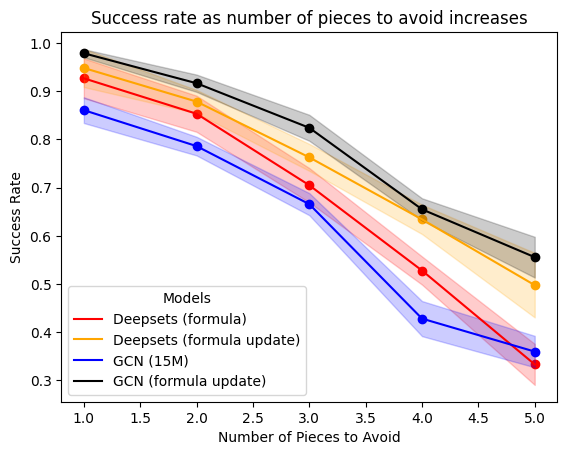

In [20]:
ablation_cols = ["Deepsets (formula)", "Deepsets (formula update)", "GCN (15M)", "GCN (formula update)"]
colors = ['red', 'orange', 'blue', 'black']

make_latest_ablation_graphs(ablation_cols, colors)

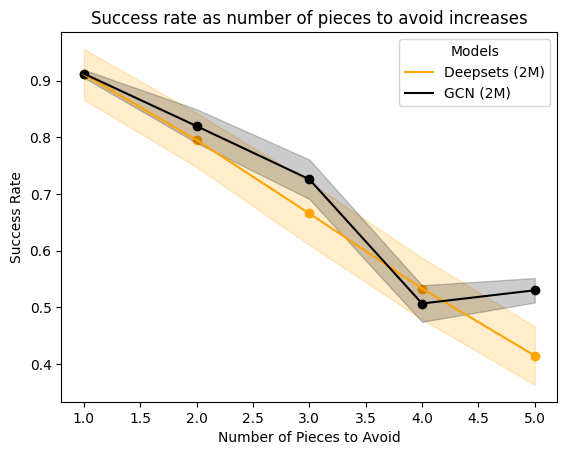

In [21]:
ablation_cols = ["Deepsets (2M)", "GCN (2M)"]
colors = ['orange', 'black']

make_latest_ablation_graphs(ablation_cols, colors)

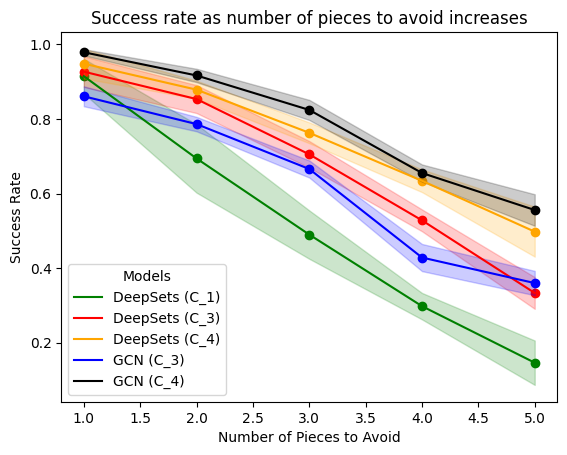

In [22]:
ablation_cols = ["Deepsets (15M)", "Deepsets (formula)", "Deepsets (formula update)", "GCN (15M)", "GCN (formula update)"]
col_names = ["DeepSets (C_1)", "DeepSets (C_3)", "DeepSets (C_4)", "GCN (C_3)", "GCN (C_4)"]
colors = ['green', 'red', 'orange', 'blue', 'black']

make_latest_ablation_graphs(ablation_cols, colors, col_names=col_names)

In [23]:
def plot_results(env, exp_list, labels, colors, seed_list=None):

    if seed_list is None:
        seed_list = [list(range(1, 6)) for _ in range(len(exp_list))]

    for i, (exp, seeds) in enumerate(zip(exp_list, seed_list)):
        dfs = [pd.read_csv(f"eval_results/{env}/{exp}/{i}.csv", header=0) for i in seeds]

        mean_df = pd.concat(dfs).groupby(level=0).mean()
        std_df = pd.concat(dfs).groupby(level=0).std()

        plt.plot(mean_df.index, mean_df["return"], label=labels[i], color=colors[i])  # Mean line
        plt.fill_between(mean_df.index,
                         mean_df["return"] - std_df["return"],
                         mean_df["return"] + std_df["return"],
                         color=colors[i], alpha=0.2)

    plt.xlabel("Number of Training Steps (/229376)")
    plt.ylabel("ADR")
    plt.title("ADR over time")
    plt.legend(title="Models")
    plt.show()

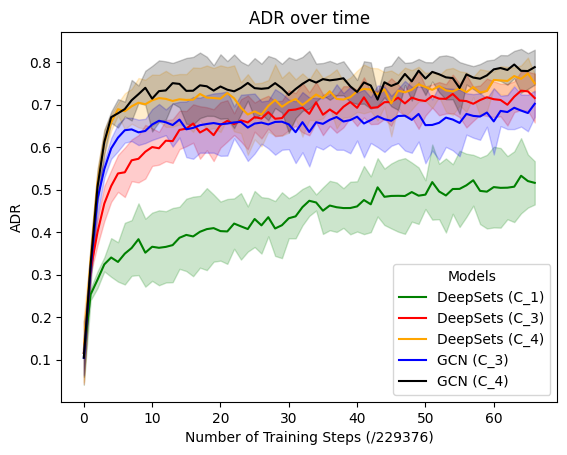

In [24]:

files_adr = [
                'deepsets_stay_update_4_finest',
                'deepsets_update_2',
                'deepsets_formula_update',
                'gcn_formula_big_skip_6_finer',
                'gcn_formula_update',
               ]

col_adr = ["DeepSets (C_1)", "DeepSets (C_3)", "DeepSets (C_4)", "GCN (C_3)", "GCN (C_4)"]
color_adr = ['green', 'red', 'orange', 'blue', 'black']


plot_results('ChessWorld-v1', files_adr, col_adr, color_adr)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_combined_results(env, exp_list, labels, colors, cols, 
                           seed_list=None, parent_dir="chessworld8_ablation/stay_update/", col_names=None, update=False):
    if seed_list is None:
        seed_list = [list(range(1, 6)) for _ in range(len(exp_list))]
    if col_names is None:
        col_names = cols

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    ### Left Plot: ADR over time (from plot_results)
    ax = axes[0]
    for i, (exp, seeds) in enumerate(zip(exp_list, seed_list)):
        dfs = [pd.read_csv(f"eval_results/{env}/gcn_formula_update_quick/{seed}.csv") if (exp =='gcn_formula_update' and seed == 5 and update) else 
               pd.read_csv(f"eval_results/{env}/{exp}/{seed}.csv", header=0) for seed in seeds]

        mean_df = pd.concat(dfs).groupby(level=0).mean()
        std_df = pd.concat(dfs).groupby(level=0).std()

        ax.plot(mean_df.index, mean_df["return"], label=labels[i], color=colors[i])
        ax.fill_between(mean_df.index,
                        mean_df["return"] - std_df["return"],
                        mean_df["return"] + std_df["return"],
                        color=colors[i], alpha=0.2)

    ax.set_xlabel("Number of Training Steps (/229376)")
    ax.set_ylabel("ADR")
    ax.set_title("ADR over Time")
    ax.legend(title="Models")

    ### Right Plot: Success Rate vs Number of Pieces to Avoid (from make_latest_ablation_graphs)
    ax = axes[1]
    all_dfs = [pd.read_csv(parent_dir + str(seed) + "/results.csv", header=[0,1], index_col=0) for seed in range(1, 6)]

    mean_df = pd.concat(all_dfs).groupby(level=0).mean()
    std_df = pd.concat(all_dfs).groupby(level=0).std()

    for i, (col, col_name) in enumerate(zip(cols, col_names)):
        df_mean = mean_df[col]
        df_std = std_df[col]

        ax.plot(df_mean.index, df_mean["successes_mean"], label=col_name, color=colors[i])
        ax.scatter(df_mean.index, df_mean["successes_mean"], color=colors[i])
        ax.fill_between(df_mean.index,
                        df_mean["successes_mean"] - df_std["successes_mean"],
                        df_mean["successes_mean"] + df_std["successes_mean"],
                        color=colors[i], alpha=0.2)

    ax.set_xlabel("Number of Pieces to Avoid")
    ax.set_ylabel("Success Rate")
    ax.set_title("Success Rate vs Number of Pieces to Avoid")
    ax.legend(title="Models")

    plt.tight_layout()
    plt.show()


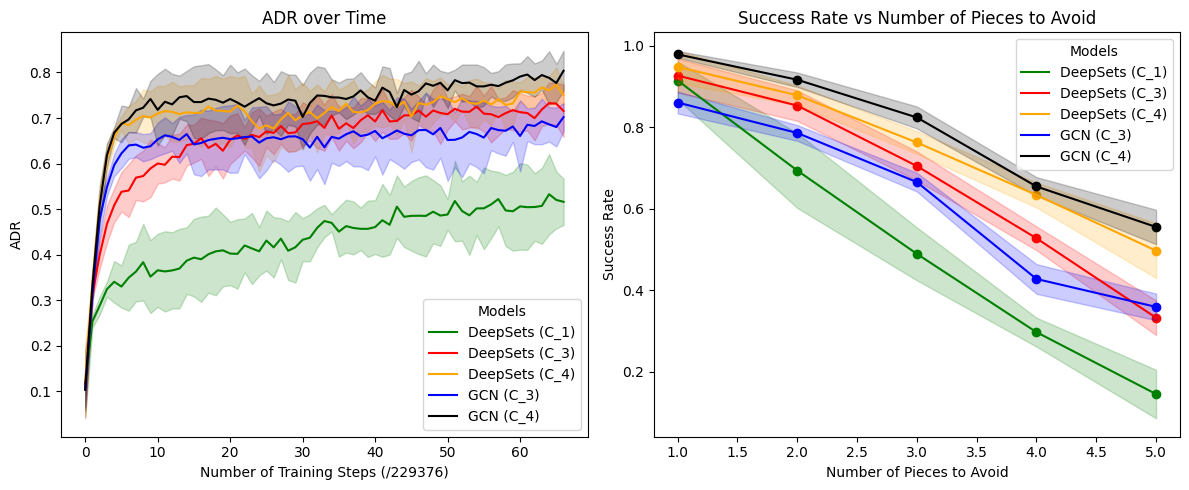

In [34]:
plot_combined_results('ChessWorld-v1', files_adr, col_adr, color_adr, ablation_cols, col_names=col_names, update=True)

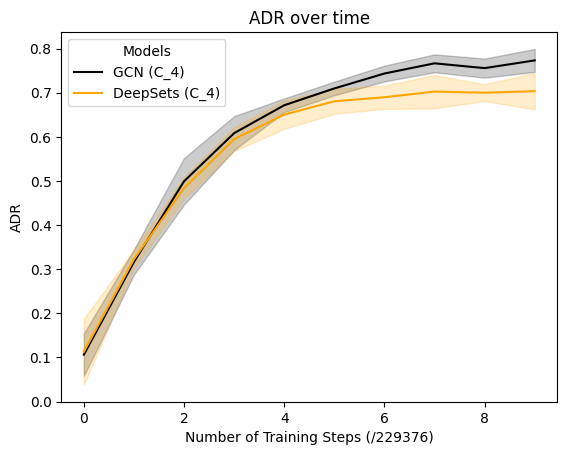

In [27]:
plot_results('ChessWorld-v1', ['gcn_race_update', 'deepsets_race_update',],
             ['GCN (C_4)', 'DeepSets (C_4)'],
             ['black', 'orange'])